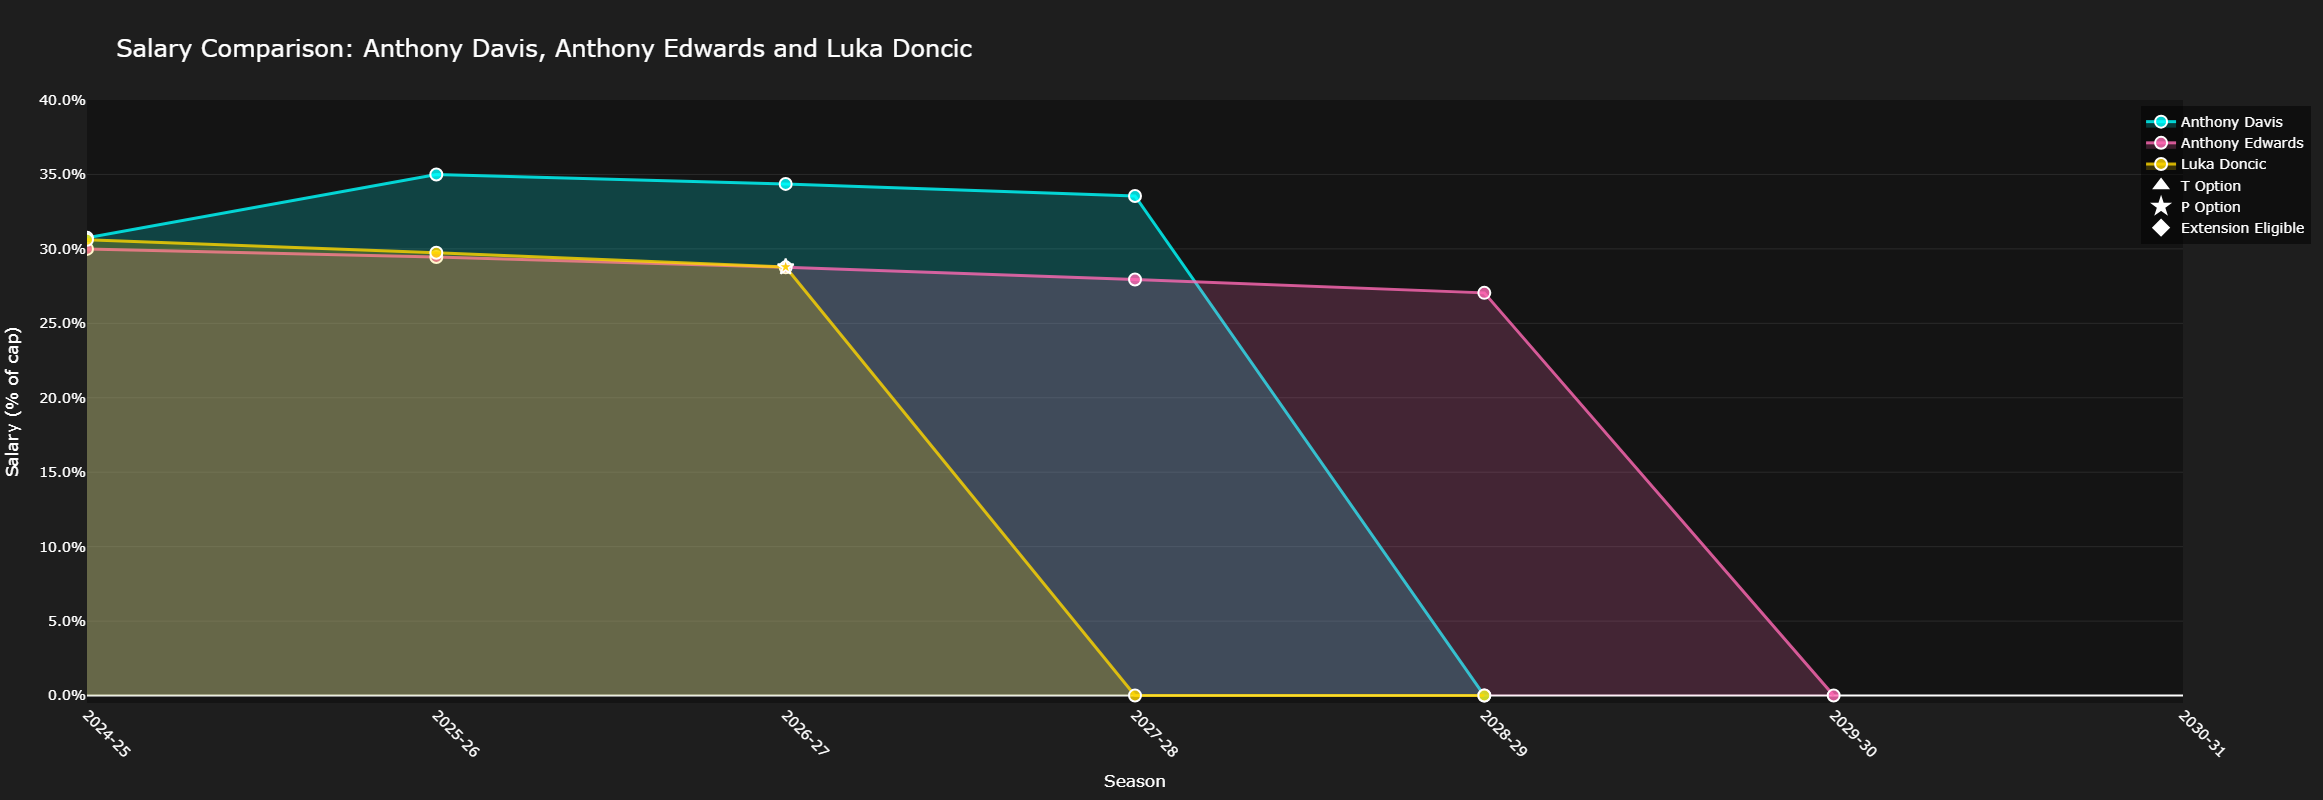

In [41]:

import pandas as pd
import math
import plotly.figure_factory as ff

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np


player1=1628369
player2=1630162


import plotly.graph_objects as go
import pandas as pd

import plotly.graph_objects as go
import pandas as pd

import plotly.graph_objects as go
import pandas as pd

def compare_player_salaries(df, *player_ids):
    if len(player_ids) > 4:
        raise ValueError("Maximum of 4 players can be compared at once")
        
    cap = pd.read_csv('cap.csv')
    cap['Season'] = cap['Season'].apply(lambda x: f"{x.split('-')[0]}-{str(int(x.split('-')[1]))[-2:]}")
    
    seasons = [col for col in df.columns if col.startswith('20')]
    season_cap = dict(zip(cap['Season'], cap['Salary Cap']))
    
    for season in seasons:
        df[season] = 100 * df[season] / season_cap[season]
    
    fig = go.Figure()
    
    option_markers = {
        'T': 'triangle-up',
        'P': 'star',
        'ee': 'diamond',
        '': 'circle'
    }
    
    # Enhanced color palette with better opacity
    colors = [
        'rgba(0, 255, 255, 0.8)',    # cyan
        'rgba(255, 105, 180, 0.8)',  # hot pink
        'rgba(255, 215, 0, 0.8)',    # gold
        'rgba(50, 205, 50, 0.8)'     # lime green
    ]
    
    for i, player_id in enumerate(player_ids):
        player_data = df[df['nba_id'] == player_id].iloc[0]
        years = [int(season.split('-')[0]) for season in seasons]
        y_values = [float(str(player_data[season]).replace('$', '').replace(',', '')) 
                   if pd.notna(player_data[season]) else None 
                   for season in seasons]
        print(y_values)
        print(seasons)
        options = [player_data[f'option_{season}'] if pd.notna(player_data[f'option_{season}']) else ''
                  for season in seasons]
        
        fig.add_trace(go.Scatter(
            x=years,
            y=y_values,
            name=player_data['name'],
            line=dict(color=colors[i], width=3),
            mode='lines+markers',
            marker=dict(
                size=12,
                symbol=[option_markers.get(opt, 'circle') for opt in options],
                line=dict(width=2, color='white'),
            ),
            hovertemplate=(
                "Season: %{x}<br>" +
                "Salary: %{y:.1f}% of cap<br>" +
                "Option: %{text}<br>" +
                "<extra></extra>"
            ),
            text=options,
            fill='tozeroy',
            fillcolor=colors[i].replace('0.8', '0.2')
        ))
    
    # Create title based on number of players
    player_names = [df[df['nba_id'] == pid].iloc[0]['name'] for pid in player_ids]
    if len(player_names) == 2:
        title = f"Salary Comparison: {player_names[0]} vs {player_names[1]}"
    else:
        title = f"Salary Comparison: {', '.join(player_names[:-1])} and {player_names[-1]}"
    
    fig.update_layout(
        title=dict(
            text=title,
            font=dict(size=24),
            y=0.95
        ),
        xaxis_title="Season",
        yaxis_title="Salary (% of cap)",
        yaxis=dict(
            tickformat=".1f",
            ticksuffix="%",
            tickmode='linear',
            dtick=5,  # Adjust tick spacing
            range=[-2, 40],
            gridcolor='rgba(128, 128, 128, 0.2)',
        ),
        xaxis=dict(
            tickangle=45,
            tickmode='array',
            ticktext=seasons,
            tickvals=seasons,
            gridcolor='rgba(128, 128, 128, 0.2)',
        ),
        showlegend=True,
        hovermode='x unified',
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.98,
            bgcolor='rgba(0,0,0,0.5)',
            bordercolor='rgba(255,255,255,0.2)',
        ),
        plot_bgcolor='rgb(20,20,20)',
        paper_bgcolor='rgb(30,30,30)',
        font=dict(
            color='white',
            size=14
        ),
        height=800,
        width=1200,
        margin=dict(t=100, b=80, l=80, r=50)  # Increased margins for better tick visibility
    )
    
    # Add legend entries for option markers
    for option, symbol in option_markers.items():
        if option:
            fig.add_trace(go.Scatter(
                x=[None],
                y=[None],
                mode='markers',
                marker=dict(
                    symbol=symbol,
                    size=12,
                    color='white',
                    line=dict(width=2, color='white')
                ),
                name=f'{option} Option' if option != "ee" else "Extension Eligible",
                showlegend=True
            ))
    
    return fig

df=pd.read_csv('salary_spread.csv')
fig = compare_player_salaries(df,player1,player2)
fig.show()